# Muon Lifetime Data Generator
This notebook will create simulated data for students to analyze. It will be formatted like the data that is obtained from the TeachSpin apparatus.

In [0]:
import numpy as np
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.style.use('ggplot')

We create a random floating point number between 0 and 200 microseconds that corresponds to a lifetime measurement, $t$. We'll make 100 000 total events. Then, we make a probability amplitude, which is random numbers between 0 and 1. To create the muon data, we'll say if
$$P < {\rm e}^{-t/\tau},$$
then 
$${\rm muon~data} = t$$
else:
$${\rm muon~data = random~between~40000~and~40010}$$
where $P$ is the random probability amplitude value; $t$ is our random lifetimes, and $\tau$ is the actual muon lifetime of 2.2 microseconds. This has the effect of only selecting a few events as muon decays, and most events will timeout the instrument.

In [21]:
random_lifetime = np.random.random_sample(100000)*200
random_amplitude = np.random.random_sample(100000)
muon_data = np.zeros(100000)
muon_data = np.where(np.exp(-random_lifetime/2.2) >= random_amplitude, random_lifetime, np.random.random_integers(40000, 40010, 1))
print(muon_data)


[4.00060000e+04 4.00060000e+04 4.00060000e+04 ... 2.50479981e+00
 4.00060000e+04 4.00060000e+04]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(40000, 40010 + 1) instead
  after removing the cwd from sys.path.


We now have an array of data much like we would get from the instrument. Let's plot to see that most of it is data that ran out the clock, and only a few of the points are actual decays.

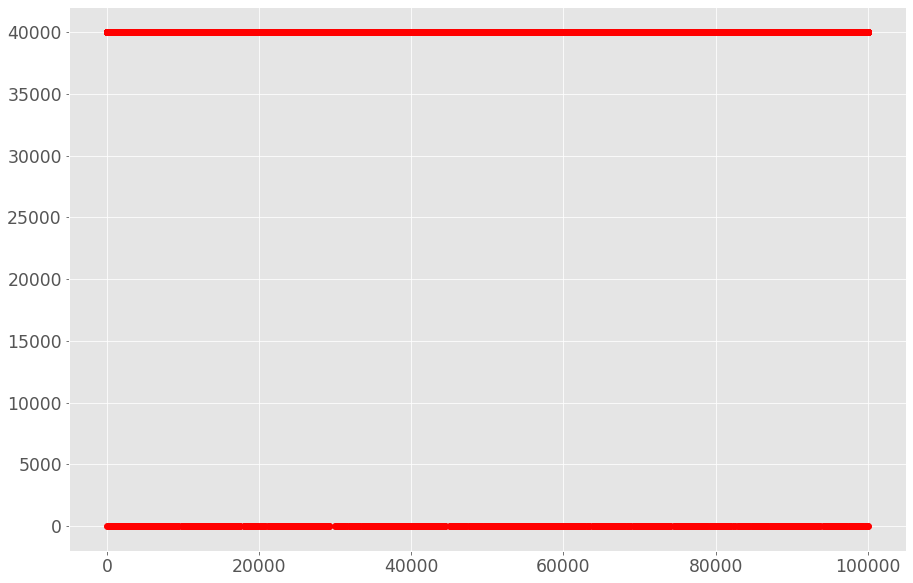

In [22]:
plt.plot(muon_data, 'ro')
plt.show()

Okay, that looks good. Let's make sure we can slice out the real events that did not timeout on the instrument.

In [23]:
realindices = np.where(muon_data < 40000)
real_data = np.array(muon_data[realindices])
print(real_data)

[1.74345758 1.75903363 1.54234084 ... 0.58718267 3.24997613 2.50479981]


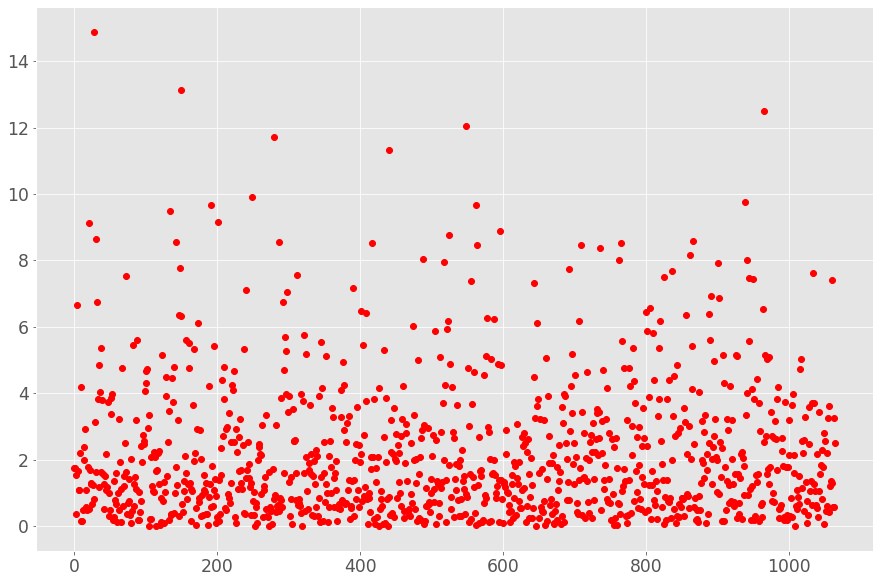

In [24]:
plt.plot(real_data, 'ro')
plt.show()

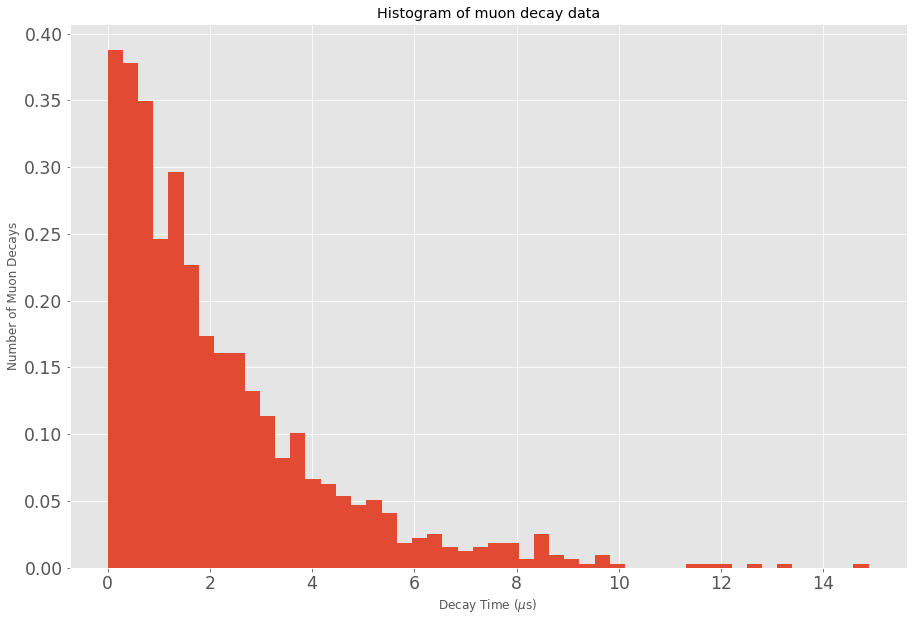

In [27]:
plt.title('Histogram of muon decay data')
plt.xlabel('Decay Time ($\mu$s)')
plt.ylabel('Number of Muon Decays')
plt.hist(real_data, bins=50, density=True)
plt.show()

50
50
(array([0.41877393, 2.26215078]), array([[ 7.06562764e-05, -3.59891039e-04],
       [-3.59891039e-04,  4.06948074e-03]]))


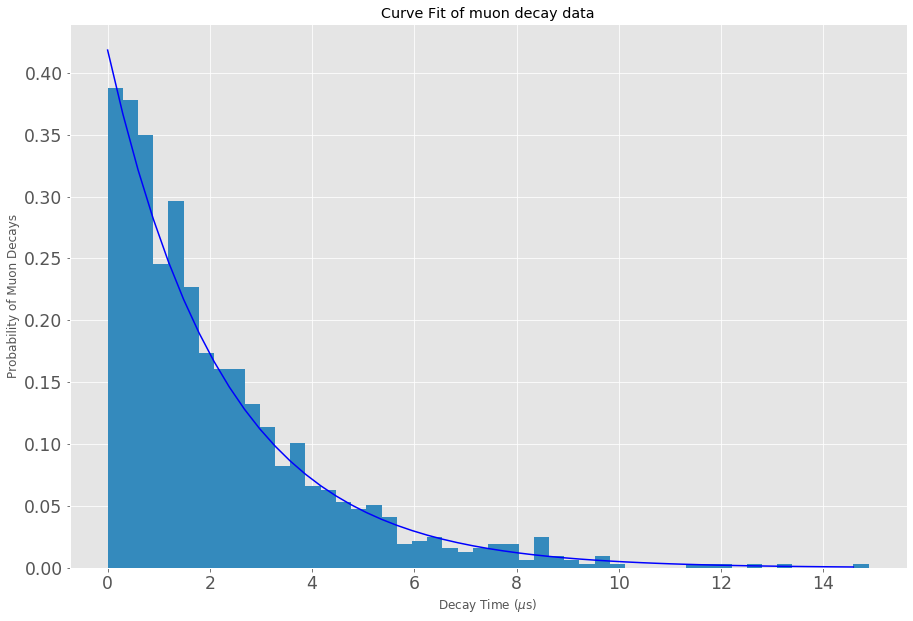

In [36]:
x0 = [0.5, 2] # initial guesses
nbins = 50

hist_y, hist_x, junk = plt.hist(real_data, bins=nbins, density=True) # create a data array
sigma = np.sqrt(hist_y+1)

hist_x = hist_x[0:nbins]

#hist_x = asarray(hist_x)
#hist_y = asarray(hist_y)
print(len(hist_x))
print(len(hist_y))

def expfit(x, a, t):
    return a*np.exp(-x/t)
result = optimization.curve_fit(expfit, hist_x, hist_y, x0, sigma)
print(result)

y=result[0][0]*np.exp(-(hist_x)/result[0][1]) #y=a*exp(-bx) is the best-fit function
plt.title('Curve Fit of muon decay data')
plt.xlabel('Decay Time ($\mu$s)')
plt.ylabel('Probability of Muon Decays')
plt.hist(real_data, bins=nbins, density=True)
plt.plot(hist_x, y, '-b')
plt.show()